<a href="https://colab.research.google.com/github/mksharsh568/Data-science-project/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 from google.colab import files
 uploaded = files.upload()

Saving kmeas_clustering_data.csv to kmeas_clustering_data.csv


In [ ]:
import io
data = io.BytesIO(uploaded['kmeas_clustering_data.csv'])  

import pandas as pd   
df = pd.read_csv(data)

df.head()

,Customer_No,Dependent,Age_rounded,Income_rounded_Annual_USD,Household_exp,Comm_exp,Buying_Potential
0,C1001,6,40,70000,3000,200,150
1,C1002,2,30,10000,4000,500,200
2,C1003,7,20,20000,4000,100,150
3,C1004,4,60,40000,5000,300,300
4,C1005,1,30,20000,2000,600,200


In [ ]:
data = df.drop(['Customer_No'],axis =1)
data.head()

,Dependent,Age_rounded,Income_rounded_Annual_USD,Household_exp,Comm_exp,Buying_Potential
0,6,40,70000,3000,200,150
1,2,30,10000,4000,500,200
2,7,20,20000,4000,100,150
3,4,60,40000,5000,300,300
4,1,30,20000,2000,600,200


In [ ]:
X=data.iloc[:, [0,1,2,3,4,5]].values

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

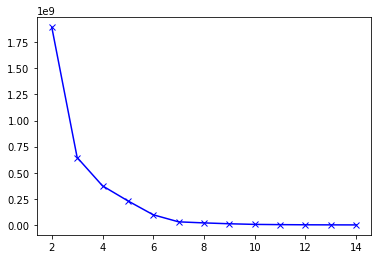

In [ ]:
Sum_of_squared_distances = []
K = range(2,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.show()

In [ ]:
## Train the model and save the output cluster labels to a csv file
model = KMeans(n_clusters=5, random_state=42) 
data_kmeans = model.fit(X)
data['cluster_labels'] = data_kmeans.labels_

In [ ]:
# data.head()
data

,Dependent,Age_rounded,Income_rounded_Annual_USD,Household_exp,Comm_exp,Buying_Potential,cluster_labels
0,6,40,70000,3000,200,150,2
1,2,30,10000,4000,500,200,4
2,7,20,20000,4000,100,150,1
3,4,60,40000,5000,300,300,0
4,1,30,20000,2000,600,200,1
5,6,40,60000,3000,300,200,2
6,5,30,60000,3000,300,200,2
7,7,30,70000,4000,100,200,2
8,2,40,30000,3000,600,150,3
9,3,50,30000,6000,400,300,3


In [ ]:
## Silhoute coefficient for clusters
score = silhouette_score(data, model.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.720


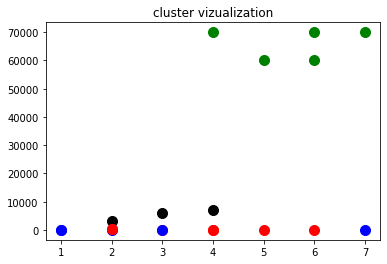

In [ ]:
y_kmeans = data_kmeans.fit_predict(X)

import matplotlib.pyplot as plt
plt.title("cluster vizualization")

plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 2], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 3], s=100, c='black', label ='Cluster 4')
plt.scatter(X[y_kmeans==4, 0], X[y_kmeans==4, 4], s=100, c='red', label ='Cluster 1')

In [ ]:
cluster1 = data[data["cluster_labels"] == 0]
cluster1.describe()

,Dependent,Age_rounded,Income_rounded_Annual_USD,Household_exp,Comm_exp,Buying_Potential,cluster_labels
count,5.000000,5.0000,5.000000,5.000000,5.000000,5.000000,5.0
mean,4.400000,52.0000,42000.000000,4600.000000,280.000000,280.000000,0.0
std,1.140175,8.3666,4472.135955,1673.320053,130.384048,75.828754,0.0
min,3.000000,40.0000,40000.000000,2000.000000,100.000000,200.000000,0.0
25%,4.000000,50.0000,40000.000000,4000.000000,200.000000,200.000000,0.0
50%,4.000000,50.0000,40000.000000,5000.000000,300.000000,300.000000,0.0
75%,5.000000,60.0000,40000.000000,6000.000000,400.000000,350.000000,0.0
max,6.000000,60.0000,50000.000000,6000.000000,400.000000,350.000000,0.0


In [ ]:
cluster2 = data[data["cluster_labels"] == 1]
cluster2.describe()

,Dependent,Age_rounded,Income_rounded_Annual_USD,Household_exp,Comm_exp,Buying_Potential,cluster_labels
count,5.00000,5.000000,5.0,5.000000,5.000000,5.000000,5.0
mean,2.80000,36.000000,20000.0,3800.000000,460.000000,150.000000,1.0
std,2.48998,19.493589,0.0,1483.239697,230.217289,35.355339,0.0
min,1.00000,20.000000,20000.0,2000.000000,100.000000,100.000000,1.0
25%,1.00000,30.000000,20000.0,3000.000000,400.000000,150.000000,1.0
50%,2.00000,30.000000,20000.0,4000.000000,500.000000,150.000000,1.0
75%,3.00000,30.000000,20000.0,4000.000000,600.000000,150.000000,1.0
max,7.00000,70.000000,20000.0,6000.000000,700.000000,200.000000,1.0


In [ ]:
cluster3 = data[data["cluster_labels"] == 2]
cluster3.describe()

,Dependent,Age_rounded,Income_rounded_Annual_USD,Household_exp,Comm_exp,Buying_Potential,cluster_labels
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.0
mean,5.600000,36.000000,66000.000000,3000.000000,220.000000,200.000000,2.0
std,1.140175,5.477226,5477.225575,707.106781,83.666003,35.355339,0.0
min,4.000000,30.000000,60000.000000,2000.000000,100.000000,150.000000,2.0
25%,5.000000,30.000000,60000.000000,3000.000000,200.000000,200.000000,2.0
50%,6.000000,40.000000,70000.000000,3000.000000,200.000000,200.000000,2.0
75%,6.000000,40.000000,70000.000000,3000.000000,300.000000,200.000000,2.0
max,7.000000,40.000000,70000.000000,4000.000000,300.000000,250.000000,2.0


In [ ]:
cluster4 = data[data["cluster_labels"] == 3]
cluster4.describe()


,Dependent,Age_rounded,Income_rounded_Annual_USD,Household_exp,Comm_exp,Buying_Potential,cluster_labels
count,3.0,3.0,3.0,3.000000,3.0,3.000000,3.0
mean,3.0,50.0,30000.0,5333.333333,400.0,266.666667,3.0
std,1.0,10.0,0.0,2081.665999,200.0,104.083300,0.0
min,2.0,40.0,30000.0,3000.000000,200.0,150.000000,3.0
25%,2.5,45.0,30000.0,4500.000000,300.0,225.000000,3.0
50%,3.0,50.0,30000.0,6000.000000,400.0,300.000000,3.0
75%,3.5,55.0,30000.0,6500.000000,500.0,325.000000,3.0
max,4.0,60.0,30000.0,7000.000000,600.0,350.000000,3.0


In [ ]:
cluster5 = data[data["cluster_labels"] == 4]
cluster5.describe()

,Dependent,Age_rounded,Income_rounded_Annual_USD,Household_exp,Comm_exp,Buying_Potential,cluster_labels
count,2.0,2.000000,2.0,2.000000,2.000000,2.0,2.0
mean,2.0,25.000000,10000.0,4500.000000,450.000000,200.0,4.0
std,0.0,7.071068,0.0,707.106781,70.710678,0.0,0.0
min,2.0,20.000000,10000.0,4000.000000,400.000000,200.0,4.0
25%,2.0,22.500000,10000.0,4250.000000,425.000000,200.0,4.0
50%,2.0,25.000000,10000.0,4500.000000,450.000000,200.0,4.0
75%,2.0,27.500000,10000.0,4750.000000,475.000000,200.0,4.0
max,2.0,30.000000,10000.0,5000.000000,500.000000,200.0,4.0
